In [3]:
iterations = 50

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


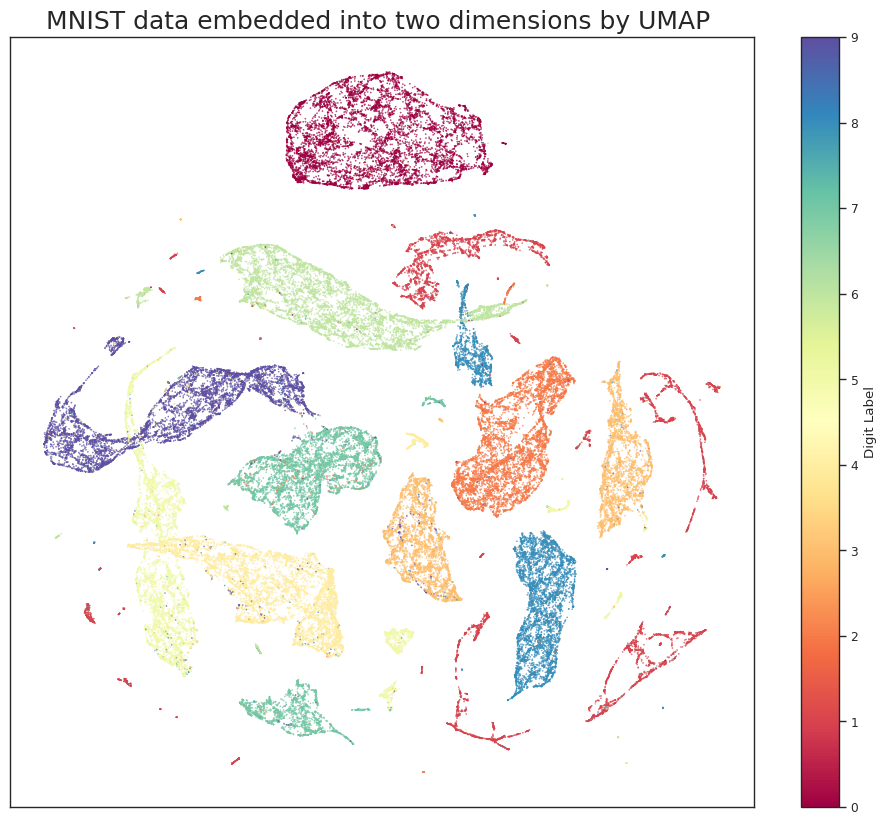

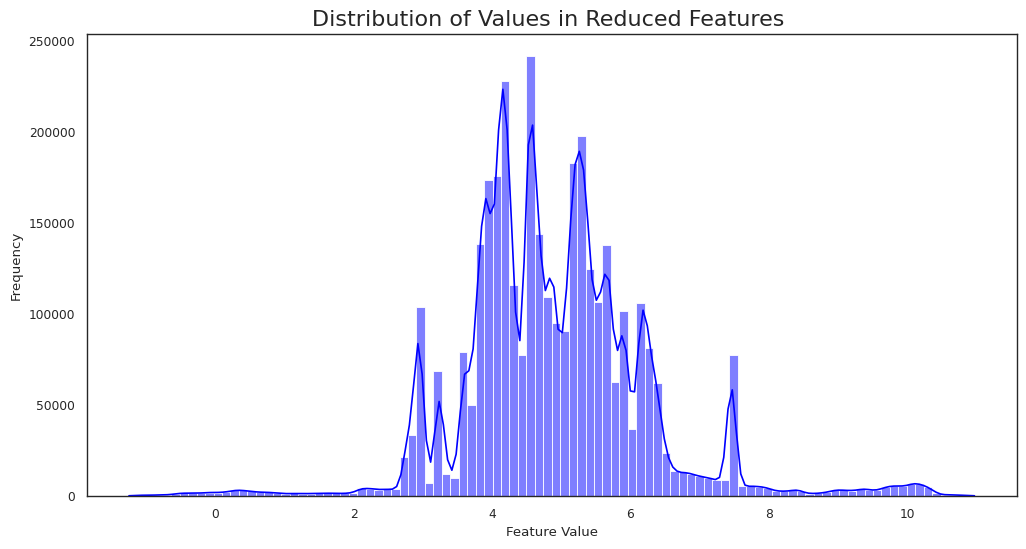

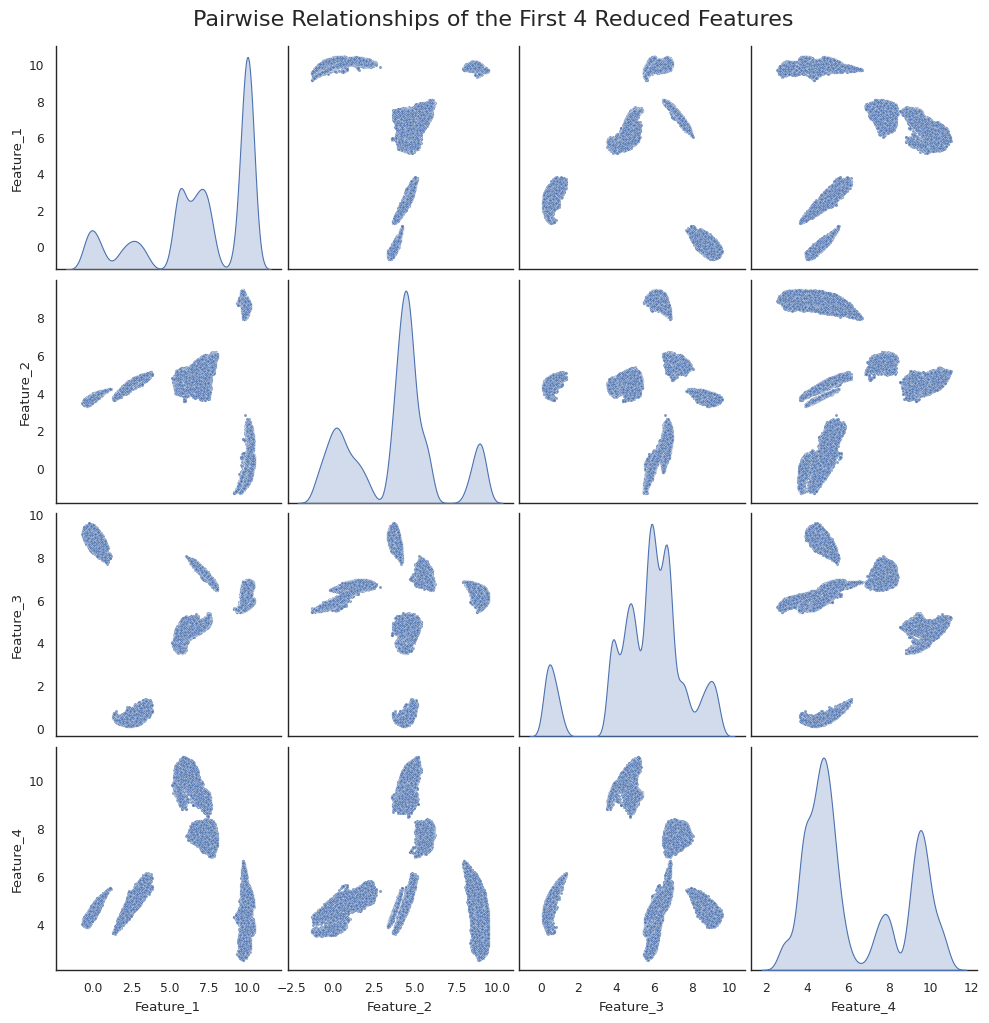

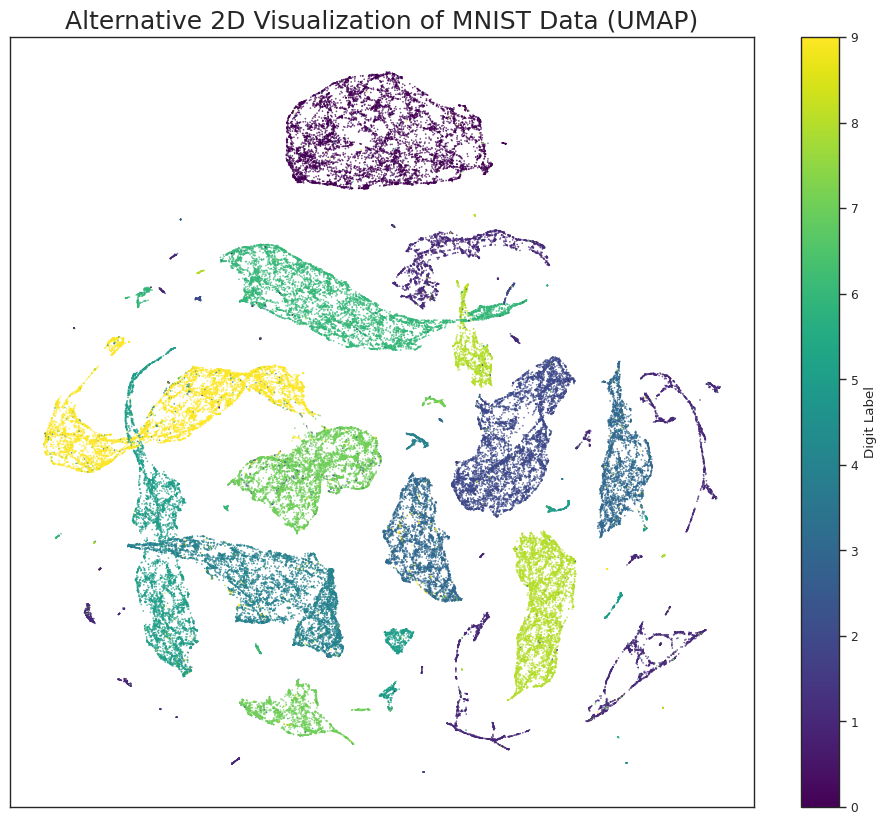

Shape of the reduced dataset (50 features): (70000, 50)


In [10]:
!pip install umap-learn
from sklearn.datasets import fetch_openml
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(context="paper", style="white")

# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1)


reducer = umap.UMAP(n_components=iterations, random_state=42)
reduced_data = reducer.fit_transform(mnist.data)

# Convert reduced data to a DataFrame for better handling
reduced_df = pd.DataFrame(reduced_data, columns=[f"Feature_{i+1}" for i in range(iterations)])

# Further reduce to 2D for visualization
visual_reducer = umap.UMAP(n_components=2, random_state=42)
embedding = visual_reducer.fit_transform(reduced_data)

# Plot the embedded data (2D representation)
fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP ", fontsize=18)
plt.colorbar(scatter, ax=ax, label="Digit Label")
plt.show()

# Histogram of reduced features
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(reduced_df.values.flatten(), bins=100, kde=True, color="blue", ax=ax)
ax.set_title("Distribution of Values in Reduced Features ", fontsize=16)
ax.set_xlabel("Feature Value")
ax.set_ylabel("Frequency")
plt.show()

# Pairplot of the first 4 features
sns.pairplot(reduced_df.iloc[:, :4], diag_kind="kde", plot_kws={"s": 5, "alpha": 0.7})
plt.suptitle("Pairwise Relationships of the First 4 Reduced Features", y=1.02, fontsize=16)
plt.show()

# Alternative visualization of 2D embedding with a different colormap
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=color, cmap="viridis", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Alternative 2D Visualization of MNIST Data (UMAP)", fontsize=18)
plt.colorbar(scatter, ax=ax, label="Digit Label")
plt.show()

# Print the shape of the reduced dataset
print(f"Shape of the reduced dataset (50 features): {reduced_data.shape}")
